# Why employees leave company?

## Background

today I will talk about the factors contributing to employees leaving their companies and also try and predict if a specific employee will leave the company.

## Package Installation

In [66]:
import numpy as np 
import pandas as pd 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn import metrics 
import matplotlib.pyplot as plt 

## Dataset Import

In [67]:
data = pd.read_csv("HR_comma_sep.csv")
data.head(5)
# we could see many interesting features related with dismissal rate, such as satisfaction level, 
#the number of projects the employee works for, average monthly hours the employee works for the firm,
# departments, salary, if he/she get promostion in the last 5 years, does some work accident happen to the worker? 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Preparation 

In [68]:
# Check null value
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [69]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [70]:
# The column 'sales' is weird here, so we take a look at it. 
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [71]:
#It seems it used a wrong column name, it should be department, not sales, so we could use rename function to edit it. 
# the dependent variable is column'left', other related factors is satisfaction level, evaluation and others. 
y, X = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', 
                 data, return_type='dataframe')
X = X.rename(columns = {
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'Department: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium'}) 
y = np.ravel(y) # change y to an array

## Exploratory data analysis

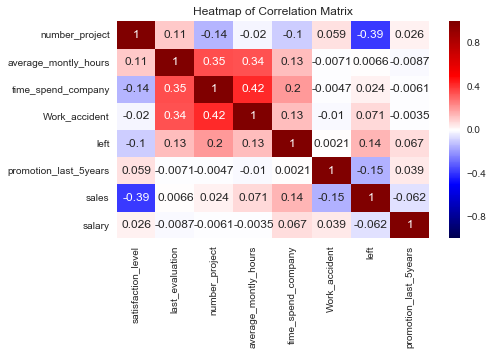

In [98]:
# Let's first explore them holistically
import seaborn as sns
fig = plt.figure(figsize=(7,4))
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='seismic',
            xticklabels=data.columns.values,
            yticklabels=data.columns.values)
plt.title('Heatmap of Correlation Matrix')

There seems to be a clear inverse relation between satisfaction levels and people leaving.  
We will now visualize the distribution of several features of interest using a histogram or a kernel density estimate plot.

### 1. Satisfaction_Level & Left

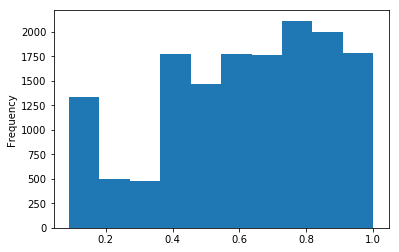

In [74]:
% matplotlib inline
# histogram to show the distribution of satisfaction level 
data['satisfaction_level'].plot(kind='hist')
# We could find most employees have satisfaction-level above 0.4, some of them are below 0.4.

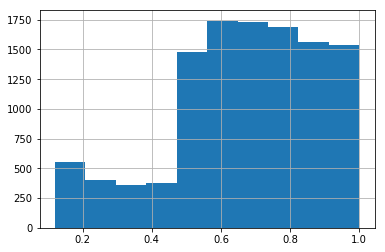

In [75]:
# then we would think if among people who are below 0.5 are more likely to leave the firm. 
# we seperately plot the distributions between left and unleft
data[data.left==0].satisfaction_level.hist()
plt.show()

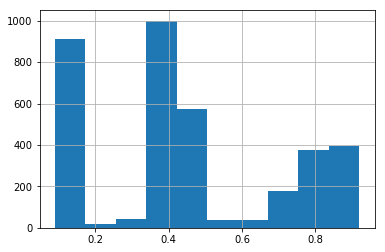

In [76]:
data[data.left==1].satisfaction_level.hist()
plt.show()
# comparing these two plots, we cound find those people who didn't leave the firms have much higher satisfaction level than others

Let's take a deep dive here.

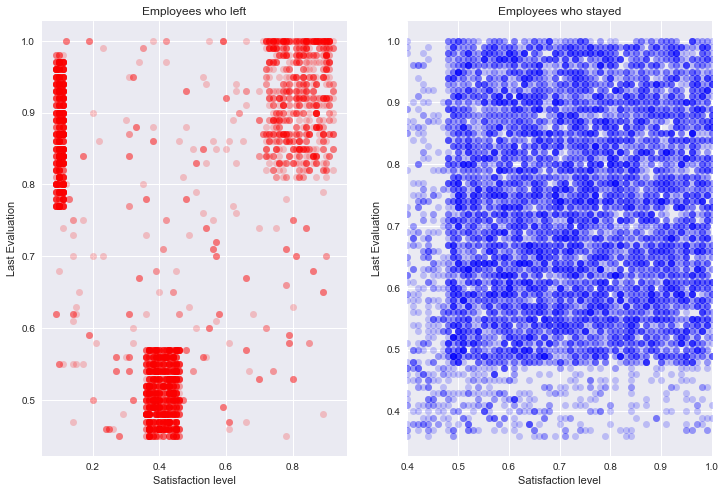

In [99]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(data.satisfaction_level[data.left == 1],data.last_evaluation[data.left == 1],'ro', alpha = 0.2)
plt.ylabel('Last Evaluation')
plt.title('Employees who left')
plt.xlabel('Satisfaction level')

plt.subplot(1,2,2)
plt.title('Employees who stayed')
plt.plot(data.satisfaction_level[data.left == 0],data.last_evaluation[data.left == 0],'bo', alpha = 0.2,)
plt.xlim([0.4,1])
plt.ylabel('Last Evaluation')
plt.xlabel('Satisfaction level')

There are 3 clusters for those employees who left.

1. The happy and appreciated - we'll call them "Winners" - those who leave because they were offered a better opportunity.

2. The appreciated but unhappy - Maybe they are over-qualified for the job. Let's call them the "Frustrated"

3. The unappreciated and unhappy - It is not surprising that these would leave, possibly even fired. They are simply a "Bad Match"  

we could say
People who have left were in general less satisfied with their jobs. However there are also people who are quite satisfied with their jobs but still left. This means that there are other factors contributing to an employee leaving their job other than them being satisfied with their job or not. satisfaction_level seems to be a good feature in differentiating people who left the company from people who did not leave.

### 2. Salary & Left 

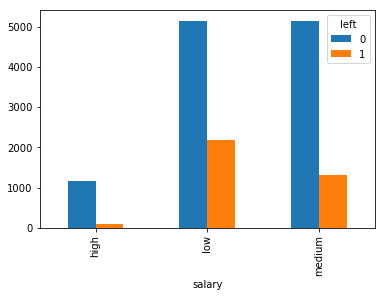

In [72]:
#we'd like to think about the reason why these workers left the firms, the first reason I might come up with is salary
pd.crosstab(data.salary, data.left).plot(kind='bar')
plt.show()
# We could find when salary is low, the number of people left is large compared with the number of people didn't leave. 
# When salary is high, the number if small, which makes sense, right. 

### 3. Salary & Percentage Left

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317
salary
high      1237
low       7316
medium    6446
dtype: int64


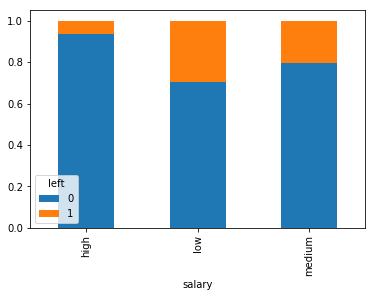

In [73]:
q = pd.crosstab(data.salary, data.left)
print(q)
print(q.sum(1))
q.div(q.sum(1), axis = 0).plot(kind='bar', stacked = True)
plt.show()

### 4. Evaluation & Left

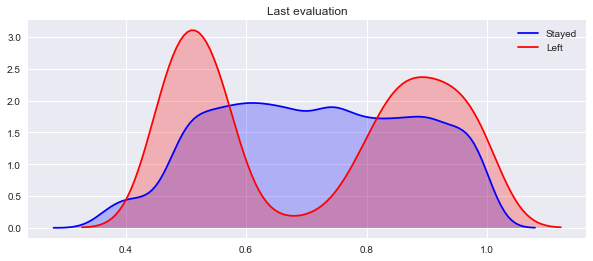

In [100]:
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(data.loc[(data['left'] == 0),'last_evaluation'] , color='b',shade=True,label='Stayed')
ax=sns.kdeplot(data.loc[(data['left'] == 1),'last_evaluation'] , color='r',shade=True, label='Left')
plt.title('Last evaluation')

Looks like people who leave the company either did pretty bad or pretty good in their last performance evaluation. There are not many medium level performers among the people who left. If an employee is evaluated in the range of 0.6 to 0.8 (ball park), they are likely still working in the company.

## Model Building 

In [77]:
model = LogisticRegression()

In [78]:
model.fit(X, y)
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[-0.72412181013]
1,Department: Random,[-0.464653354051]
2,Department: Accounting,[0.114807469957]
3,Department: HR,[0.344702497401]
4,Department: Management,[-0.361976915768]
5,Department: Marketing,[0.0942542721871]
6,Department: Product_Management,[-0.0380803171411]
7,Department: Sales,[0.0695353902177]
8,Department: Support,[0.150609692944]
9,Department: Technical,[0.173677034038]


In [79]:
print(model.score(X,y))

0.791919461297


Let's break up our set into training and testing sets, as we only have one file  
training dataset size is 0.7

In [88]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
model2 = LogisticRegression(C=10000)
model2.fit(Xtrain, ytrain)
pred = model2.predict(Xtest)
metrics.accuracy_score(ytest, pred)
# We could see the accuracy score is 0.79 

0.7917777777777778

In [92]:
# Then let's compare the actual left/unleft number and the predicted left/unleft number
metrics.confusion_matrix(ytest, pred)

array([[3199,  263],
       [ 674,  364]])

In [93]:
#classification_report will return precision & recall for every categorization.
#sklearn.metrics.classification_report(y_true, y_pred)
print(metrics.classification_report(ytest, pred))
# here we could take a deep dive and test the accuracy of this model

             precision    recall  f1-score   support

        0.0       0.83      0.92      0.87      3462
        1.0       0.58      0.35      0.44      1038

avg / total       0.77      0.79      0.77      4500



### Validation

In [94]:
# Let's do cross validation based on the number 10.
print(cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10))

[ 0.80679547  0.792       0.79533333  0.78733333  0.804       0.804       0.794
  0.79        0.74449633  0.73582388]


### Let's do some prediction on this person

Assume he is in HR department with high salary, satisfaction level is 0.5, evaluation is 0.7, he did 4 project and average monthly hour is 160 hours. He worked here for 3 years and didn't get promoted in the last 5 years and no work accident.

Is he likely to leave the firm?

In [85]:
model.predict_proba([[1,0,0,1,0,0,0,0,0,0,0,0, 0.5, 0.7, 4.0, 160, 3.0, 0, 0]])

array([[ 0.9157868,  0.0842132]])

so we could say he is very unlikely to leave the firm, since the prediction shows the probability is 0.9